In [241]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fftpack
import time

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


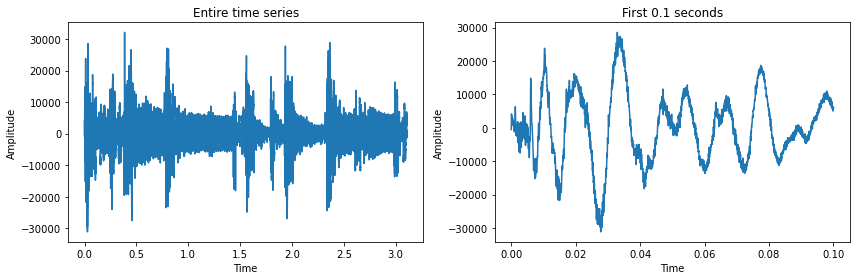

In [242]:
samplerate, dataA = wavfile.read("2.wav")
data = np.zeros(len(dataA),complex)
for i in range(len(data)):
    data[i] = dataA[i,0] + dataA[i,1]*1j

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
t = len(data)/samplerate
Time = np.linspace(0, t, len(data))
axes[0].plot(Time,data)
axes[0].set_title("Entire time series")
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Amplitude')

N = int(samplerate*0.1)
y = data[0:N]
Time = np.linspace(0, 0.1, N)
axes[1].plot(Time,np.real(y))
axes[1].set_title("First 0.1 seconds")
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Amplitude')
fig.tight_layout()
plt.show()

Looking at the time series of the 0.1 seconds of the sample, there seem to be a superposition of a lot of frequencies,
with quite high amplitude and highly likely that there exists a dominating frequency.

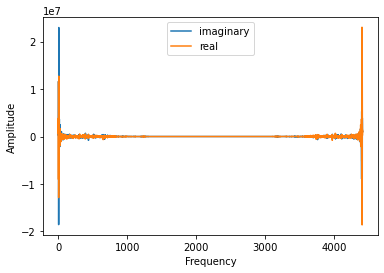

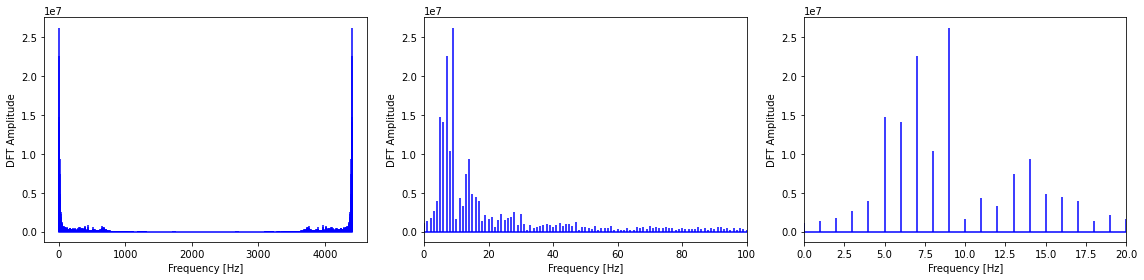

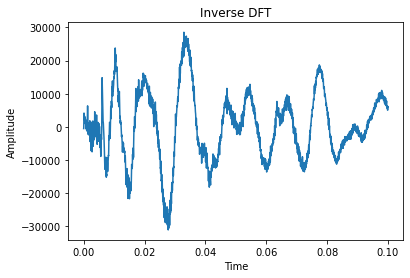

In [243]:
#Discrete Fourier Transform
c = np.zeros(N,complex)
n = np.arange(N)
for k in range(N):
    c[k] = np.sum(y*np.exp(-2j*np.pi*k*n/N))
    
plt.plot(np.imag(c), label = 'imaginary')
plt.plot(np.real(c), label = 'real')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend(loc = 'upper center')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
t = len(data)/samplerate
Time = np.linspace(0, t, len(data))
axes[0].stem(n, abs(c), 'b', markerfmt=" ", basefmt="-b")
axes[0].set_xlabel('Frequency [Hz]')
axes[0].set_ylabel('DFT Amplitude')

axes[1].stem(n, abs(c), 'b', markerfmt=" ", basefmt="-b")
axes[1].set_xlim(0,100)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('DFT Amplitude')

axes[2].stem(n, abs(c), 'b', markerfmt=" ", basefmt="-b")
axes[2].set_xlim(0,20)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('DFT Amplitude')
fig.tight_layout()
plt.show()

#Inverse DFT
y2 = np.zeros(N,complex)
k = np.arange(N)
for n in range(N):
    y2[n] = 1/N*np.sum(c*np.exp(2j*np.pi*k*n/N))
Time = np.linspace(0, 0.1, len(y2))
plt.plot(Time,np.real(y2))
plt.title("Inverse DFT")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

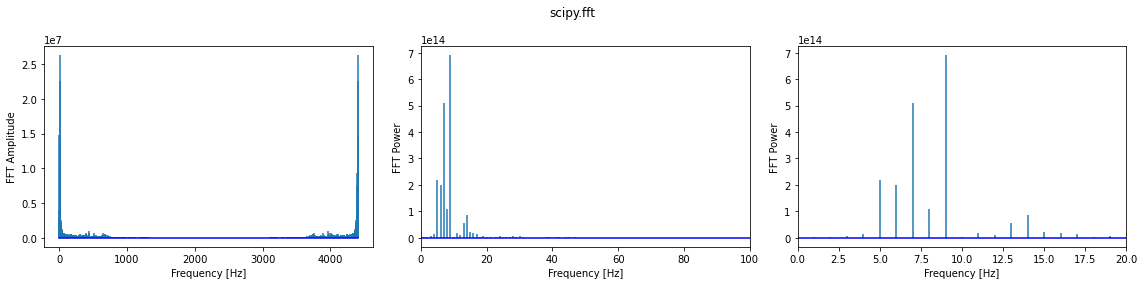

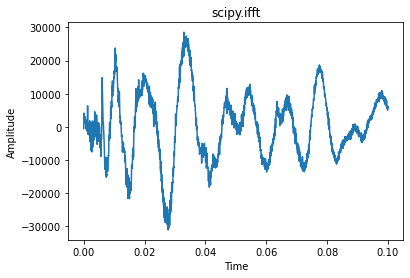

In [244]:
#Python's FFT
c = fftpack.fft(y)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
t = len(data)/samplerate
Time = np.linspace(0, t, len(data))
axes[0].stem(abs(c), markerfmt=" ", basefmt="-b")
axes[0].set_xlabel('Frequency [Hz]')
axes[0].set_ylabel('FFT Amplitude')

axes[1].stem(abs(c)**2, markerfmt=" ", basefmt="-b")
axes[1].set_xlim(0,100)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('FFT Power')

axes[2].stem(abs(c)**2, markerfmt=" ", basefmt="-b")
axes[2].set_xlim(0,20)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('FFT Power')
plt.suptitle("scipy.fft")
fig.tight_layout()
plt.show()

#Inverse FFT 
c = fftpack.ifft(c)
Time = np.linspace(0, 0.1, len(c))
plt.plot(Time,np.real(c))
plt.title("scipy.ifft")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

From both Python's built in FFT and the DFT similar spectrum is obtained and a dominating frequency of 9Hz was also 
noted. Invers transform in both cases also give back the original spectrum.

In [177]:
#Power law exponents for DFT
N = [10**x for x in range(1,6)]
T1 = []
for i in N:
    c = np.zeros(i,complex)
    n = np.arange(i)
    y = data[0:i]
    start_time = time.time()
    for k in range(i):
        c[k] = np.sum(y*np.exp(-2j*np.pi*k*n/i))
    T1.append((time.time() - start_time))
    
#Power law exponents for FFT
T2 = []
for i in N:
    c = np.zeros(i,complex)
    n = np.arange(i)
    y = data[0:i]
    start_time = time.time()
    c = fftpack.fft(y)
    T2.append((time.time() - start_time))

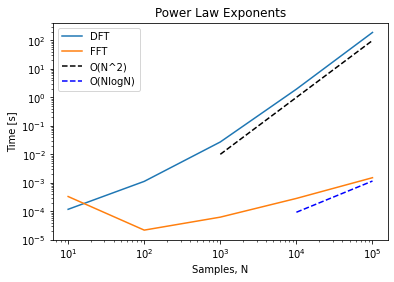

In [240]:
plt.loglog(N,T1,label="DFT")
plt.loglog(N,T2,label="FFT")
plt.xlabel('Samples, N')
plt.ylabel(r'Time [s]')
plt.title("Power Law Exponents")
y0 = [x**2/10**8 for x in N]
y1 = [x*np.log(x)/10**9 for x in N]
plt.loglog(N[2:],y0[2:],'--k',label="O(N^2)")
plt.loglog(N[3:],y1[3:],'--k',color = 'b',label="O(NlogN)")
plt.legend()
plt.show()

Looking at the curves, it can be seen that DFT has order of $N^2$ while FFT has order of $NlogN$.[1]

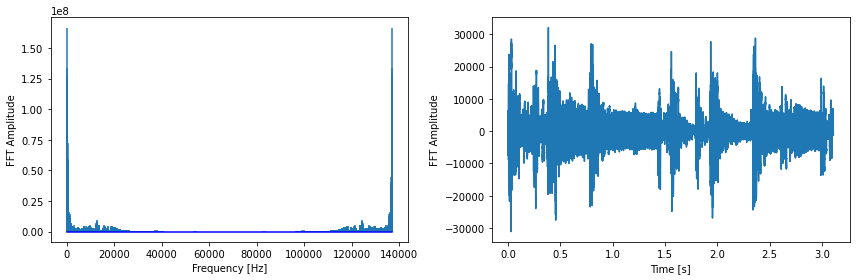

In [167]:
#FFT entire time series
FFT = fftpack.fft(data)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
t = len(data)/samplerate
Time = np.linspace(0, t, len(data))
axes[0].stem(abs(FFT), markerfmt=" ", basefmt="-b")
axes[0].set_xlabel('Frequency [Hz]')
axes[0].set_ylabel('FFT Amplitude')

#Inverse FFT
IFFT = fftpack.ifft(FFT)
t = len(data)/samplerate
Time = np.linspace(0, t, len(data))
axes[1].plot(Time,np.real(IFFT))
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('FFT Amplitude')
fig.tight_layout()
plt.show()

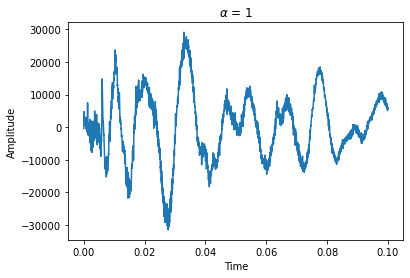

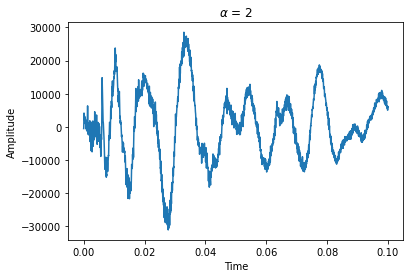

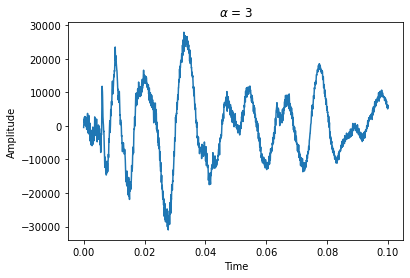

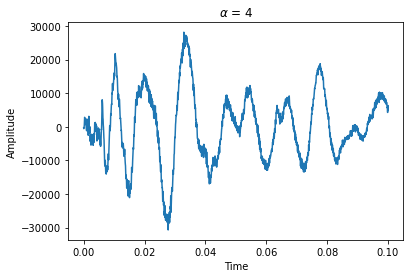

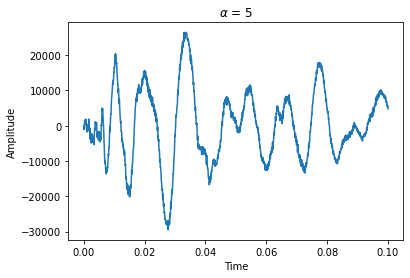

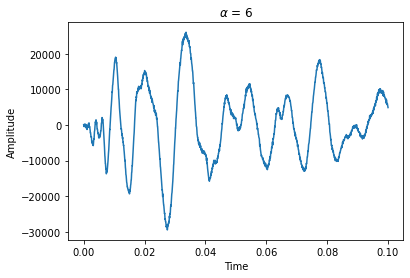

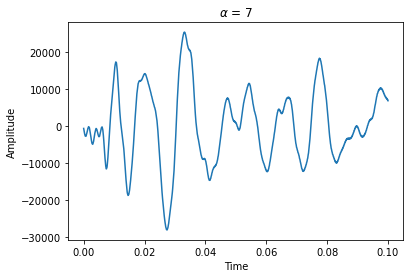

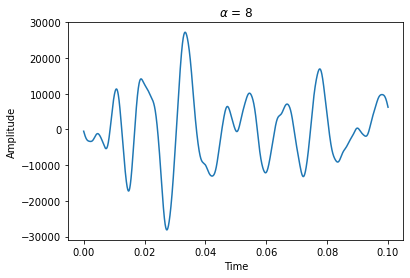

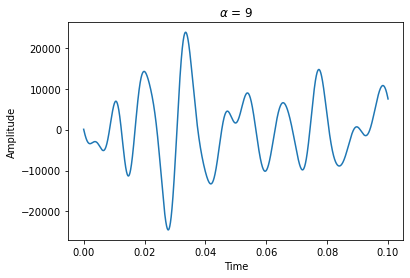

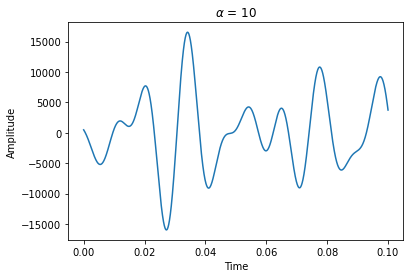

In [148]:
a = np.arange(1,11,1)
temp1 = [abs(x) for x in FFT]
temp2 = sorted(temp1, key=float)
for j in a:
    cut_off = temp2[int((1-(1/2)**j)*len(FFT))]
    RemovedData =  []
    for i in FFT:
        if(abs(i) >= cut_off):
            RemovedData.append(i)
        else:
            RemovedData.append(0)
    RemovedData1 = np.zeros(len(RemovedData),complex)
    for i in range(len(RemovedData)):
        RemovedData1[i] = RemovedData[i]
    IFFT = fftpack.ifft(RemovedData1)
    N = int(samplerate*0.1)
    y = IFFT[0:N]
    Time = np.linspace(0, 0.1, N)
    plt.plot(Time,np.real(y))
    plt.title(r'$\alpha$ = {:}'.format(j))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    IFFT1 = []
    for i in range(len(IFFT)):
        IFFT1.append([np.real(IFFT[i]) ,np.imag(IFFT[i])])
    IFFT1 = np.asarray(IFFT1)
    wavfile.write('{:}.wav'.format(j), samplerate, IFFT1)

Looing at the curves it can be seen that removing more data smooth out the curve more and in audios only high piched 
sounds were listened.

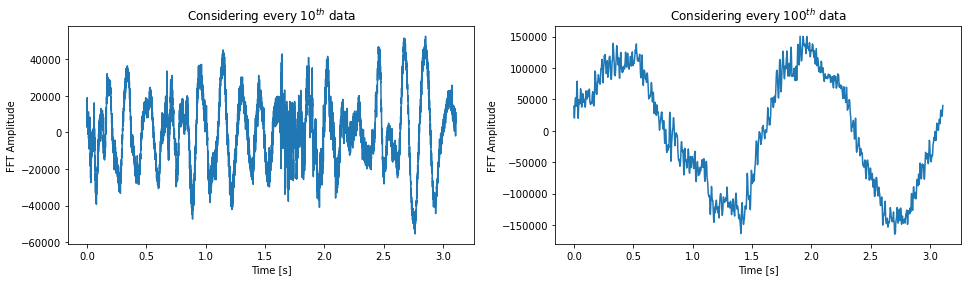

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
RemovedData = []
for i in range(len(FFT)):
    if(i % 10 == 0):
        RemovedData.append(FFT[i])
IFFT = fftpack.ifft(RemovedData)
t = len(data)/samplerate
Time = np.linspace(0, t, len(IFFT))
axes[0].plot(Time,np.real(IFFT))
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('FFT Amplitude')
axes[0].set_title(r'Considering every $10^{th}$ data')
RemovedData = []
for i in range(len(FFT)):
    if(i % 100 == 0):
        RemovedData.append(FFT[i])
IFFT = fftpack.ifft(RemovedData)
Time = np.linspace(0, t, len(IFFT))
axes[1].plot(Time,np.real(IFFT))
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('FFT Amplitude')
axes[1].set_title(r'Considering every $100^{th}$ data')
plt.show()

Looking at the curves, much more information is lost by taking 100^{th} data than every 10^{th} data. Maximum frequency
of the signal was noted to be 9Hz, so from Shanon-Nyquist theorem, to perfectly reconstruct the signal, we nned to sample
at least at every $\frac{1}{2\omega_{max}} \approx 0.05s$. ANd we clearly see that by taking datas at higher interval
sampling time is decreased and hence poorely reconstructing the signal.

\begin{equation}
    \frac{d^2y}{dt^2} + \beta\frac{dy}{dt} + \omega_0^2y = f(t)
\end{equation}

\begin{equation}
    \frac{d^2G(t;\tau)}{dt^2} + \beta\frac{dG(t;\tau)}{dt} + \omega_0^2G(t;\tau) = \delta(t - \tau)
\end{equation}

Applying Fourier Transform gives:
\begin{equation}
    [-\omega^2 - i\beta\omega + \omega_0^2 ]\tilde{G}(\omega;\tau) = \int_{-\infty}^{\infty}dte^{-i\omega t}\delta(t-\tau) = e^{-i\omega \tau}
\end{equation}

\begin{equation}
    \tilde{G}(\omega,\tau) = -\frac{e^{-i\omega \tau}}{\omega^2 + i\beta\omega - \omega_0^2}
\end{equation}

Finally, time domain Green's function can be recovered using inverse Fourier Transform.
\begin{equation}
    G(t;\tau) = \int_{-\infty}^{\infty}\frac{d\omega}{2\pi}e^{i\omega(t-\tau)}\tilde{G}(\omega,\tau) = -\int_{-\infty}^{\infty}\frac{d\omega}{2\pi} \frac{e^{-i\omega(t-\tau)}}{\omega^2+i\beta \omega - \omega_0^2}
\end{equation}

Perticular solution would then simply be:
\begin{equation}
    y(t) = \int_{-\infty}^{\infty}d\tau G(t;\tau)\frac{f(\tau)}{m}
\end{equation}

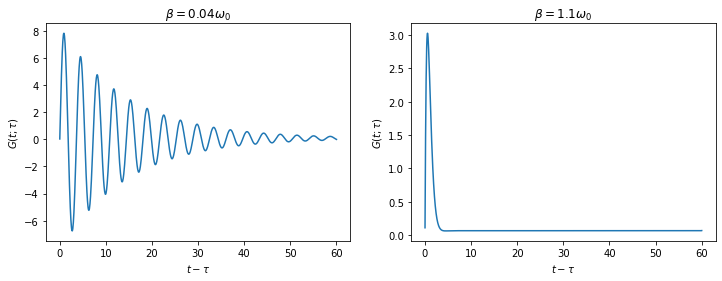

In [147]:
b = 0.04
w0 = 1

w = np.linspace(0,60,1000)
Gw = [1/2/np.pi*(-1)/(x**2 + 2j*b*x - w0**2) for x in w]

T = fftpack.fft(Gw)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(w,np.real(T))
axes[0].set_xlabel(r'$t - \tau$')
axes[0].set_ylabel(r'$G(t;\tau)$')
axes[0].set_title(r'$\beta = 0.04\omega_0$')

b = 1
w0 = 1.1

Gw = [1/2/np.pi*(-1)/(x**2 + 2j*b*x - w0**2) for x in w]

T = fftpack.fft(Gw)

axes[1].plot(w,np.real(T))
axes[1].set_xlabel(r'$t - \tau$')
axes[1].set_ylabel(r'$G(t;\tau)$')
axes[1].set_title(r'$\beta = 1.1\omega_0$')
plt.show()

Here numerically, plots of $G(t,\tau)$ is obtained for under daming and over damping cases of forced harmonic 
oscillator which agrres higly to the analytical solutions for respective cases. $[2]$

REFERENCES:
    
[1]https://www.ece.ucdavis.edu/~bbaas/281/notes/Handout.fft1.pdf

[2]https://phys.libretexts.org/Bookshelves/Mathematical_Physics_and_Pedagogy/Complex_Methods_for_the_Sciences_(Chong)/11%3A_Green's_Functions/11.01%3A_The_Driven_Harmonic_Oscillator#:~:text=Green's%20function%20for%20the%20driven%20harmonic%20oscillator,-Prior%20to%20solving&text=The%20Green's%20function%20describes%20the,(t%E2%88%92t%E2%80%B2).